In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sfimpute import preprocess
from sfimpute import impute

Pairwise distances are stored in `DistDataFrame`, a class that inherits `pd.DataFrame`.

In [2]:
data = impute.read_data("../data/mESC_Sox2_coor_wnan.txt")
ann = impute.read_data("../data/mESC_Sox2_ann.txt")
dist_df = impute.to_dist_df(data, ann)
dist_df

,region,bin1,x1,bin2,y1,y-x,cell_id.11,cell_id.14,cell_id.16,cell_id.26,...,cell_id.63060,cell_id.63061,cell_id.63064,cell_id.63067,cell_id.63074,cell_id.63078,cell_id.63082,cell_id.63084,cell_id.63092,cell_id.63093
0,129,1,34601078,2,34606078,5000,NaN,NaN,206.755208,467.079206,...,608.575798,NaN,101.739955,55.404478,203.145932,NaN,104.518158,NaN,356.225787,171.683967
1,129,1,34601078,3,34611078,10000,NaN,NaN,243.471967,NaN,...,278.333331,NaN,153.828145,NaN,337.649532,NaN,376.921676,279.661789,NaN,120.222772
2,129,1,34601078,4,34616078,15000,NaN,NaN,333.521391,170.883414,...,627.799238,NaN,98.037378,141.762106,183.194901,NaN,287.257087,NaN,NaN,38.541596
3,129,1,34601078,5,34621078,20000,NaN,NaN,297.420481,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,333.175953,NaN,301.933409,NaN
4,129,1,34601078,6,34626078,25000,NaN,NaN,342.221328,139.666952,...,NaN,NaN,92.212522,NaN,276.722280,NaN,411.292684,NaN,243.977646,84.740076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,CAST,38,34786078,40,34796078,10000,377.826615,193.539981,363.829725,285.723895,...,390.345705,513.749429,NaN,144.134128,NaN,221.175903,NaN,474.941333,192.455468,213.660756
816,CAST,38,34786078,41,34801078,15000,211.826896,272.079597,547.502187,333.073560,...,23.268946,587.134151,409.289234,78.672473,367.980236,295.413521,292.941422,666.960322,479.467425,243.048927
817,CAST,39,34791078,40,34796078,5000,NaN,415.268737,204.487723,298.987342,...,818.671174,577.315807,NaN,85.588097,NaN,344.375195,NaN,307.916475,107.999133,241.194015
818,CAST,39,34791078,41,34801078,10000,NaN,336.219944,443.209105,333.530641,...,797.061454,309.491778,432.448388,122.774136,449.269538,422.495366,293.774122,493.144733,521.094052,268.402253


`DistDataFrame` allows direct access to pairwise distances through `.to_darr()`.

In [3]:
dist_df.to_darr()

array([[         nan,          nan, 206.75520794, ...,          nan,
        356.22578697, 171.68396664],
       [         nan,          nan, 243.47196728, ..., 279.66178885,
                 nan, 120.22277216],
       [         nan,          nan, 333.52139088, ...,          nan,
                 nan,  38.54159568],
       ...,
       [         nan, 415.26873727, 204.48772269, ..., 307.91647513,
        107.99913299, 241.1940151 ],
       [         nan, 336.2199441 , 443.20910547, ..., 493.14473348,
        521.09405157, 268.40225338],
       [242.33736817, 203.15794312, 500.20370031, ..., 196.24662045,
        528.66957453, 220.08399651]])

Normalization is done by the function `sfimpute.impute.normalize_pdist_by1d`, and the result is also in the form of `DistDataFrame`. The three columns added are `lmbda`, `mu`, and `var`, which are the parameter in Box-Cox transformation, the mean, and the variance in $z$-score normalization.

In [4]:
norm_df = impute.normalize_pdist_by1d(dist_df)
norm_df

,region,bin1,x1,bin2,y1,y-x,lmbda,mu,var,cell_id.11,...,cell_id.63060,cell_id.63061,cell_id.63064,cell_id.63067,cell_id.63074,cell_id.63078,cell_id.63082,cell_id.63084,cell_id.63092,cell_id.63093
0,129,1,34601078,2,34606078,5000,0.0979,7.069349,1.381380,NaN,...,1.574010,NaN,-1.041130,-1.830449,-0.084034,NaN,-1.005042,NaN,0.742442,-0.322931
1,129,1,34601078,3,34611078,10000,0.1950,10.123244,3.836736,NaN,...,0.060194,NaN,-0.796616,NaN,0.361423,NaN,0.538127,0.067483,NaN,-1.124632
2,129,1,34601078,4,34616078,15000,0.2741,13.206656,12.065756,NaN,...,1.288065,NaN,-1.161245,-0.768608,-0.471281,NaN,0.103605,NaN,NaN,-1.994629
3,129,1,34601078,5,34621078,20000,0.2286,11.694390,5.102232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.192947,NaN,0.030316,NaN
4,129,1,34601078,6,34626078,25000,0.2707,13.705191,8.502014,NaN,...,NaN,NaN,-1.655798,NaN,-0.162076,NaN,0.495305,NaN,-0.356646,-1.753307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,CAST,38,34786078,40,34796078,10000,0.2184,10.888729,4.753460,0.581406,...,0.636247,1.114242,NaN,-0.875434,NaN,-0.265761,NaN,0.974632,-0.470082,-0.317122
1636,CAST,38,34786078,41,34801078,15000,0.2931,14.161095,13.654751,-0.318580,...,-2.433118,1.226618,0.626252,-1.436553,0.461016,0.135754,0.123721,1.454361,0.881763,-0.136121
1637,CAST,39,34791078,40,34796078,5000,0.1203,7.537534,1.703972,NaN,...,2.128579,1.541342,NaN,-1.266202,NaN,0.716742,NaN,0.544795,-0.957603,0.177465
1638,CAST,39,34791078,41,34801078,10000,0.2184,10.888729,4.753460,NaN,...,1.940617,0.254141,0.811136,-1.089518,0.877297,0.771036,0.170966,1.041186,1.139730,0.029048


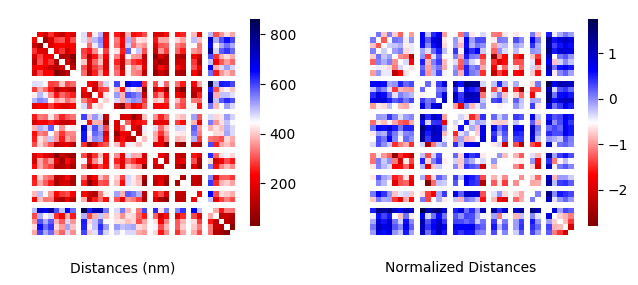

In [5]:
hap_id = dist_df.vcol()[0]
hm1 = dist_df[dist_df["region"]=="129"][hap_id].values
hm2 = norm_df[norm_df["region"]=="129"][hap_id].values
axes = plt.subplots(1, 2, figsize=(8, 3))[1].flat
preprocess.heatmap_wrapper(preprocess.to_dist_mat(hm1, np.nan), axes[0], title="Distances (nm)")
preprocess.heatmap_wrapper(preprocess.to_dist_mat(hm2, np.nan), axes[1], title="Normalized Distances")

/var/folders/b6/j675swk515969wcb6_85my200000gn/T/ipykernel_15187/1057111727.py:1: RuntimeWarning: Mean of empty slice
  hm1 = np.nanmean(dist_df[dist_df["region"]=="129"].to_darr(), axis=1)
/var/folders/b6/j675swk515969wcb6_85my200000gn/T/ipykernel_15187/1057111727.py:2: RuntimeWarning: Mean of empty slice
  hm2 = np.nanmean(norm_df[norm_df["region"]=="129"].to_darr(), axis=1)


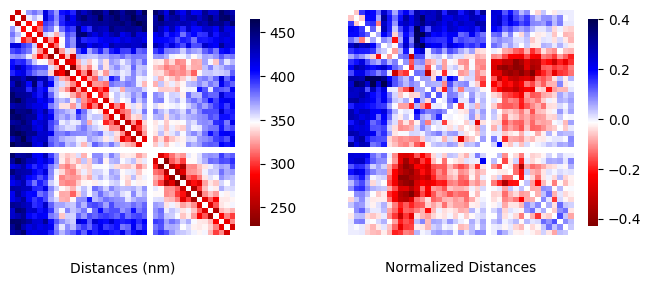

In [6]:
hm1 = np.nanmean(dist_df[dist_df["region"]=="129"].to_darr(), axis=1)
hm2 = np.nanmean(norm_df[norm_df["region"]=="129"].to_darr(), axis=1)
axes = plt.subplots(1, 2, figsize=(8, 3))[1].flat
preprocess.heatmap_wrapper(preprocess.to_dist_mat(hm1, np.nan), axes[0], title="Distances (nm)")
preprocess.heatmap_wrapper(preprocess.to_dist_mat(hm2, np.nan), axes[1], title="Normalized Distances")